## AU-ASM → FI-Hyy Transfer

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.5753,1.2624,1.0940,0.6039,0.3190,2.5030,8.1033
et,Extra Trees Regressor,0.5630,1.3772,1.1356,0.5826,0.3135,2.5096,1.3367
lightgbm,Light Gradient Boosting Machine,0.5556,1.3280,1.1231,0.5815,0.3130,2.2161,0.3133
rf,Random Forest Regressor,0.5732,1.4324,1.1596,0.5625,0.3241,2.2467,7.4767
catboost,CatBoost Regressor,0.5985,1.4750,1.1845,0.5337,0.3386,2.3244,1.5833
ada,AdaBoost Regressor,0.6569,1.4459,1.1784,0.5311,0.3627,3.1068,2.3533
huber,Huber Regressor,0.6436,1.4700,1.1853,0.5305,0.3440,2.3612,0.1433
lasso,Lasso Regression,0.6534,1.4011,1.1666,0.5275,0.3387,2.5653,0.4800
llar,Lasso Least Angle Regression,0.6534,1.4010,1.1666,0.5275,0.3387,2.5654,0.0533
en,Elastic Net,0.6588,1.4042,1.1691,0.5231,0.3397,2.5416,0.4967



🔍 AU-ASM → FI-Hyy Transfer Results for GPP:
Best Model: GradientBoostingRegressor(random_state=42)
R²:   0.4722
RMSE: 3.8359
MAE:  3.3808
ρ:    0.8469


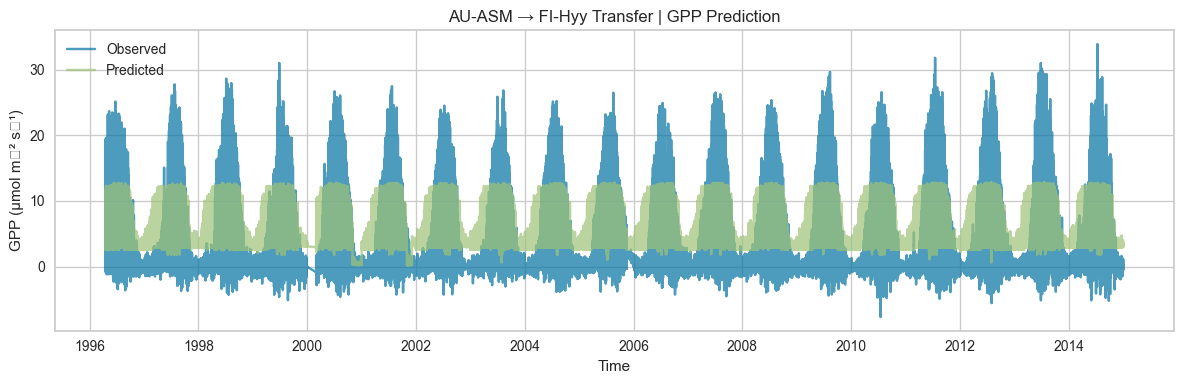

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# ========================== 1. Site paths ==========================

# AU-ASM training data
au_met = xr.open_dataset("AU-ASM/AU-ASM_2011-2017_OzFlux_Met.nc")
au_flux = xr.open_dataset("AU-ASM/AU-ASM_2011-2017_OzFlux_Flux.nc")

# FI-Hyy test data (adjust paths as needed)
fi_met = xr.open_dataset("FI-Hyy/FI-Hyy_1996-2014_FLUXNET2015_Met.nc")
fi_flux = xr.open_dataset("FI-Hyy/FI-Hyy_1996-2014_FLUXNET2015_Flux.nc")

# ========================== 2. Feature definitions ==========================

features_raw = ['SWdown', 'LWdown', 'Tair', 'Qair', 'RH', 'Psurf', 'Wind',
                'CO2air', 'VPD', 'LAI', 'Ustar']
derived_features = ['SW_LAI', 'RH_Tair', 'SWdown_lag1', 'Tair_lag1']
target_var = 'NEE'  # or 'GPP'

# ========================== 3. Preprocessing ==========================

def preprocess(met_ds, flux_ds):
    met_df = met_ds.to_dataframe().reset_index()
    flux_df = flux_ds.to_dataframe().reset_index()
    df = pd.merge_asof(met_df.sort_values('time'),
                       flux_df.sort_values('time'),
                       on='time')
    df = df[['time'] + features_raw + ['GPP', 'NEE']].dropna()

    # Derived features
    df['SW_LAI'] = df['SWdown'] * df['LAI']
    df['RH_Tair'] = df['RH'] * df['Tair']
    df['SWdown_lag1'] = df['SWdown'].shift(1)
    df['Tair_lag1'] = df['Tair'].shift(1)

    df = df.dropna().set_index('time').sort_index()
    return df

# ========================== 4. Build train/test data ==========================

df_train = preprocess(au_met, au_flux)
df_test = preprocess(fi_met, fi_flux)

features_all = features_raw + derived_features

# ========================== 5. AutoML training (AU-ASM only) ==========================

train_data = pd.concat([df_train[features_all], df_train[target_var]], axis=1).reset_index(drop=True)

s = setup(
    data=train_data,
    target=target_var,
    session_id=42,
    train_size=0.999,
    fold_strategy='timeseries',
    fold=3,
    fold_shuffle=False,
    data_split_shuffle=False,
    preprocess=True,
    numeric_features=features_all,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    verbose=False
)

best_model = compare_models(sort='R2')

# ========================== 6. Transfer evaluation (on FI-Hyy) ==========================

test_data = df_test[features_all].reset_index(drop=True)
true_vals = df_test[target_var].reset_index(drop=True)

preds = predict_model(best_model, data=test_data)
y_pred = preds['prediction_label'].values
y_true = true_vals.values

# ========================== 7. Metrics ==========================

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rho, _ = pearsonr(y_true, y_pred)

print(f"\n🔍 AU-ASM → FI-Hyy transfer results for {target_var}:")
print(f"Best model: {best_model}")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"ρ:    {rho:.4f}")

# ========================== 8. Visualization: time series comparison ==========================

plt.figure(figsize=(12, 4))
plt.plot(df_test.index, y_true, label="Observed", alpha=0.7)
plt.plot(df_test.index, y_pred, label="Predicted", alpha=0.7)
plt.title(f"AU-ASM → FI-Hyy Transfer | {target_var} Prediction")
plt.xlabel("Time")
plt.ylabel(f"{target_var} (μmol m⁻² s⁻¹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.7082,1.1895,1.0680,0.5412,0.3906,4.1799,8.1467
lightgbm,Light Gradient Boosting Machine,0.7384,1.3403,1.1274,0.4984,0.4006,4.1833,0.3067
et,Extra Trees Regressor,0.7332,1.3707,1.1365,0.4953,0.3981,3.8569,2.3733
catboost,CatBoost Regressor,0.7412,1.3032,1.1205,0.4900,0.4034,4.4915,1.4833
ada,AdaBoost Regressor,0.7976,1.4295,1.1708,0.4485,0.4201,5.6041,1.7067
rf,Random Forest Regressor,0.8091,1.6875,1.2431,0.4174,0.4252,4.4944,10.1367
xgboost,Extreme Gradient Boosting,0.8228,1.7709,1.2786,0.3771,0.4308,4.8332,0.6233
ridge,Ridge Regression,0.8706,1.5102,1.2237,0.3242,0.4313,7.1229,0.0700
lasso,Lasso Regression,0.8924,1.5696,1.2457,0.3046,0.4490,7.1407,0.0567
llar,Lasso Least Angle Regression,0.8924,1.5697,1.2457,0.3045,0.4490,7.1412,0.0567



🔍 AU-ASM → FI-Hyy Transfer Results for NEE:
Best Model: GradientBoostingRegressor(random_state=42)
R²:   -2.1934
RMSE: 7.7223
MAE:  7.3156
ρ:    0.7516


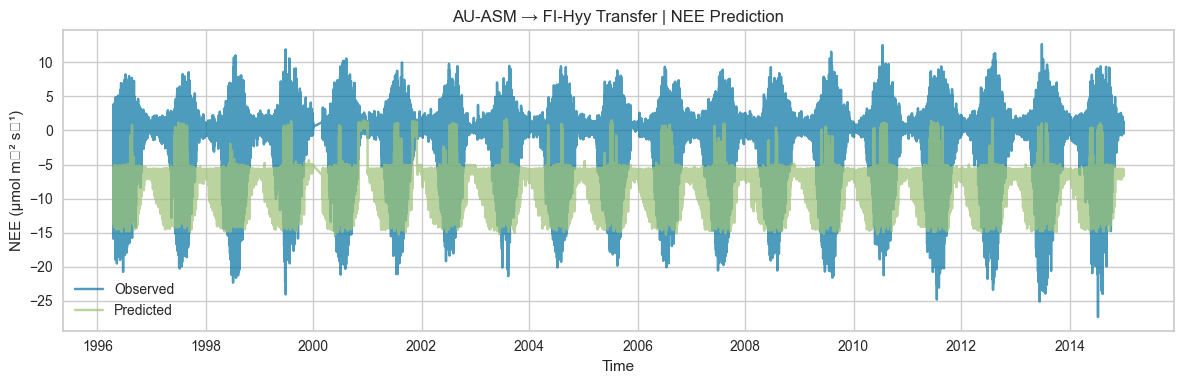

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# ========================== 1. Site paths ==========================

# AU-ASM training data
au_met = xr.open_dataset("AU-ASM/AU-ASM_2011-2017_OzFlux_Met.nc")
au_flux = xr.open_dataset("AU-ASM/AU-ASM_2011-2017_OzFlux_Flux.nc")

# FI-Hyy test data (adjust paths as needed)
fi_met = xr.open_dataset("FI-Hyy/FI-Hyy_1996-2014_FLUXNET2015_Met.nc")
fi_flux = xr.open_dataset("FI-Hyy/FI-Hyy_1996-2014_FLUXNET2015_Flux.nc")

# ========================== 2. Feature definitions ==========================

features_raw = ['SWdown', 'LWdown', 'Tair', 'Qair', 'RH', 'Psurf', 'Wind',
                'CO2air', 'VPD', 'LAI', 'Ustar']
derived_features = ['SW_LAI', 'RH_Tair', 'SWdown_lag1', 'Tair_lag1']
target_var = 'NEE'  # or 'GPP'

# ========================== 3. Preprocessing ==========================

def preprocess(met_ds, flux_ds):
    met_df = met_ds.to_dataframe().reset_index()
    flux_df = flux_ds.to_dataframe().reset_index()
    df = pd.merge_asof(met_df.sort_values('time'),
                       flux_df.sort_values('time'),
                       on='time')
    df = df[['time'] + features_raw + ['GPP', 'NEE']].dropna()

    # Derived features
    df['SW_LAI'] = df['SWdown'] * df['LAI']
    df['RH_Tair'] = df['RH'] * df['Tair']
    df['SWdown_lag1'] = df['SWdown'].shift(1)
    df['Tair_lag1'] = df['Tair'].shift(1)

    df = df.dropna().set_index('time').sort_index()
    return df

# ========================== 4. Build train/test data ==========================

df_train = preprocess(au_met, au_flux)
df_test = preprocess(fi_met, fi_flux)

features_all = features_raw + derived_features

# ========================== 5. AutoML training (AU-ASM only) ==========================

train_data = pd.concat([df_train[features_all], df_train[target_var]], axis=1).reset_index(drop=True)

s = setup(
    data=train_data,
    target=target_var,
    session_id=42,
    train_size=0.999,
    fold_strategy='timeseries',
    fold=3,
    fold_shuffle=False,
    data_split_shuffle=False,
    preprocess=True,
    numeric_features=features_all,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    verbose=False
)

best_model = compare_models(sort='R2')

# ========================== 6. Transfer evaluation (on FI-Hyy) ==========================

test_data = df_test[features_all].reset_index(drop=True)
true_vals = df_test[target_var].reset_index(drop=True)

preds = predict_model(best_model, data=test_data)
y_pred = preds['prediction_label'].values
y_true = true_vals.values

# ========================== 7. Metrics ==========================

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rho, _ = pearsonr(y_true, y_pred)

print(f"\n🔍 AU-ASM → FI-Hyy transfer results for {target_var}:")
print(f"Best model: {best_model}")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"ρ:    {rho:.4f}")

# ========================== 8. Visualization: time series comparison ==========================

plt.figure(figsize=(12, 4))
plt.plot(df_test.index, y_true, label="Observed", alpha=0.7)
plt.plot(df_test.index, y_pred, label="Predicted", alpha=0.7)
plt.title(f"AU-ASM → FI-Hyy Transfer | {target_var} Prediction")
plt.xlabel("Time")
plt.ylabel(f"{target_var} (μmol m⁻² s⁻¹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## FI-Hyy → US-UMB

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.8229,2.0104,1.4110,0.9280,0.2931,2.9620,6.2500
lightgbm,Light Gradient Boosting Machine,0.8318,2.0504,1.4272,0.9262,0.3178,2.2306,0.4467
gbr,Gradient Boosting Regressor,0.8512,2.1118,1.4466,0.9243,0.3116,2.9043,17.1967
rf,Random Forest Regressor,0.8494,2.1334,1.4551,0.9234,0.3036,3.3862,28.2033
catboost,CatBoost Regressor,0.8553,2.1759,1.4708,0.9214,0.3111,2.8406,3.1367
xgboost,Extreme Gradient Boosting,0.9062,2.4815,1.5685,0.9115,0.3165,2.9294,0.3700
ada,AdaBoost Regressor,1.1890,3.1450,1.7715,0.8865,0.3953,11.4888,5.5967
knn,K Neighbors Regressor,1.0729,3.2119,1.7894,0.8843,0.3807,4.7068,0.2567
dt,Decision Tree Regressor,1.1852,3.9050,1.9733,0.8590,0.3760,6.9827,1.3033
ridge,Ridge Regression,1.5132,5.1103,2.2493,0.8179,0.4685,15.2056,0.5733



🔍 FI-Hyy → US-UMB Transfer Results for GPP:
Best Model: ExtraTreesRegressor(n_jobs=-1, random_state=42)
R²:   0.8657
RMSE: 2.6710
MAE:  1.5389
ρ:    0.9335


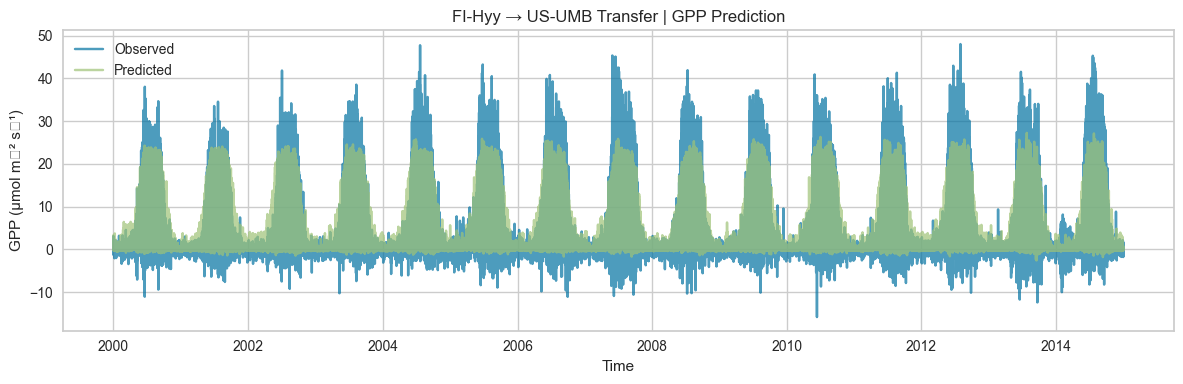

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# ========================== 1. Site paths ==========================

# FI-Hyy training data
fi_met = xr.open_dataset("FI-Hyy/FI-Hyy_1996-2014_FLUXNET2015_Met.nc")
fi_flux = xr.open_dataset("FI-Hyy/FI-Hyy_1996-2014_FLUXNET2015_Flux.nc")

# US-UMB test data
us_met = xr.open_dataset("US-UMB/US-UMB_2000-2014_FLUXNET2015_Met.nc")
us_flux = xr.open_dataset("US-UMB/US-UMB_2000-2014_FLUXNET2015_Flux.nc")

# ========================== 2. Feature definitions ==========================

features_raw = ['SWdown', 'LWdown', 'Tair', 'Qair', 'RH', 'Psurf', 'Wind',
                'CO2air', 'VPD', 'LAI', 'Ustar']
derived_features = ['SW_LAI', 'RH_Tair', 'SWdown_lag1', 'Tair_lag1']
target_var = 'GPP'  # or 'NEE'

# ========================== 3. Preprocessing ==========================

def preprocess(met_ds, flux_ds):
    met_df = met_ds.to_dataframe().reset_index()
    flux_df = flux_ds.to_dataframe().reset_index()
    df = pd.merge_asof(met_df.sort_values('time'),
                       flux_df.sort_values('time'),
                       on='time')
    df = df[['time'] + features_raw + ['GPP', 'NEE']].dropna()

    # Derived features
    df['SW_LAI'] = df['SWdown'] * df['LAI']
    df['RH_Tair'] = df['RH'] * df['Tair']
    df['SWdown_lag1'] = df['SWdown'].shift(1)
    df['Tair_lag1'] = df['Tair'].shift(1)

    df = df.dropna().set_index('time').sort_index()
    return df

# ========================== 4. Build train/test data ==========================

df_train = preprocess(fi_met, fi_flux)
df_test = preprocess(us_met, us_flux)

features_all = features_raw + derived_features

# ========================== 5. AutoML training (FI-Hyy only) ==========================

train_data = pd.concat([df_train[features_all], df_train[target_var]], axis=1).reset_index(drop=True)

s = setup(
    data=train_data,
    target=target_var,
    session_id=42,
    train_size=0.999,
    fold_strategy='timeseries',
    fold=3,
    fold_shuffle=False,
    data_split_shuffle=False,
    preprocess=True,
    numeric_features=features_all,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    verbose=False
)

best_model = compare_models(sort='R2')

# ========================== 6. Transfer evaluation (on US-UMB) ==========================

test_data = df_test[features_all].reset_index(drop=True)
true_vals = df_test[target_var].reset_index(drop=True)

preds = predict_model(best_model, data=test_data)
y_pred = preds['prediction_label'].values
y_true = true_vals.values

# ========================== 7. Metrics ==========================

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rho, _ = pearsonr(y_true, y_pred)

print(f"\n🔍 FI-Hyy → US-UMB transfer results for {target_var}:")
print(f"Best model: {best_model}")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"ρ:    {rho:.4f}")

# ========================== 8. Visualization: time series comparison ==========================

plt.figure(figsize=(12, 4))
plt.plot(df_test.index, y_true, label="Observed", alpha=0.7)
plt.plot(df_test.index, y_pred, label="Predicted", alpha=0.7)
plt.title(f"FI-Hyy → US-UMB Transfer | {target_var} Prediction")
plt.xlabel("Time")
plt.ylabel(f"{target_var} (μmol m⁻² s⁻¹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.7946,1.6646,1.2851,0.9111,0.2803,1.4096,6.1400
lightgbm,Light Gradient Boosting Machine,0.7999,1.6784,1.2920,0.9099,0.2888,1.4726,0.9867
catboost,CatBoost Regressor,0.8149,1.7240,1.3102,0.9071,0.2916,1.5094,4.0900
gbr,Gradient Boosting Regressor,0.8299,1.7873,1.3309,0.9046,0.2947,1.5836,17.1867
rf,Random Forest Regressor,0.8391,1.7968,1.3371,0.9036,0.3020,1.5509,24.6800
xgboost,Extreme Gradient Boosting,0.8449,1.8557,1.3585,0.9007,0.3017,1.5426,0.3800
ada,AdaBoost Regressor,1.1374,2.8293,1.6737,0.8498,0.4092,3.0118,4.9733
knn,K Neighbors Regressor,1.1355,3.0542,1.7432,0.8365,0.4024,2.0185,0.3000
dt,Decision Tree Regressor,1.1690,3.4357,1.8505,0.8152,0.3947,2.1488,1.1367
lr,Linear Regression,1.4801,4.6297,2.1410,0.7540,0.5049,3.0672,0.1433



🔍 FI-Hyy → US-UMB Transfer Results for NEE:
Best Model: ExtraTreesRegressor(n_jobs=-1, random_state=42)
R²:   0.8193
RMSE: 2.6684
MAE:  1.5463
ρ:    0.9084


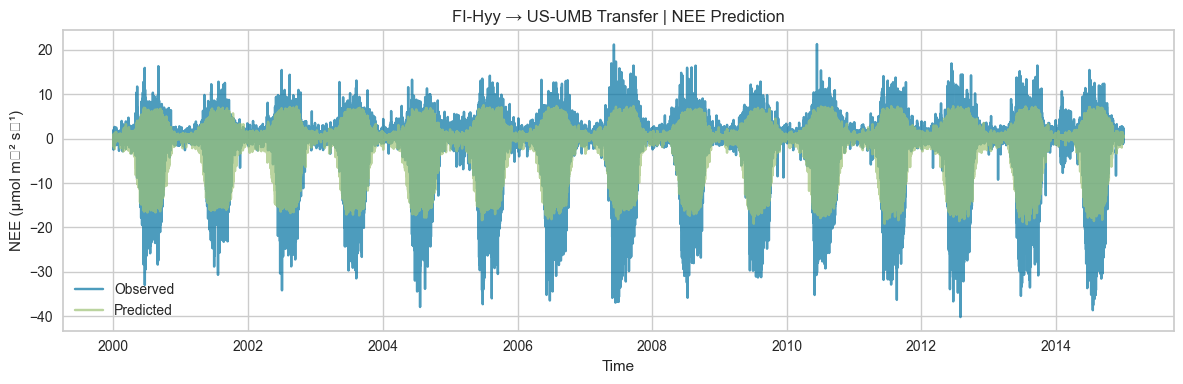

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# ========================== 1. 站点路径设置 ==========================

# FI-Hyy 训练数据
fi_met = xr.open_dataset("FI-Hyy/FI-Hyy_1996-2014_FLUXNET2015_Met.nc")
fi_flux = xr.open_dataset("FI-Hyy/FI-Hyy_1996-2014_FLUXNET2015_Flux.nc")

# US-UMB 测试数据
us_met = xr.open_dataset("US-UMB/US-UMB_2000-2014_FLUXNET2015_Met.nc")
us_flux = xr.open_dataset("US-UMB/US-UMB_2000-2014_FLUXNET2015_Flux.nc")

# ========================== 2. 特征定义 ==========================

features_raw = ['SWdown', 'LWdown', 'Tair', 'Qair', 'RH', 'Psurf', 'Wind',
                'CO2air', 'VPD', 'LAI', 'Ustar']
derived_features = ['SW_LAI', 'RH_Tair', 'SWdown_lag1', 'Tair_lag1']
target_var = 'NEE'  # ✅ 你也可以改为 GPP

# ========================== 3. 数据预处理函数 ==========================

def preprocess(met_ds, flux_ds):
    met_df = met_ds.to_dataframe().reset_index()
    flux_df = flux_ds.to_dataframe().reset_index()
    df = pd.merge_asof(met_df.sort_values('time'), flux_df.sort_values('time'), on='time')
    df = df[['time'] + features_raw + ['GPP', 'NEE']].dropna()

    # 派生特征
    df['SW_LAI'] = df['SWdown'] * df['LAI']
    df['RH_Tair'] = df['RH'] * df['Tair']
    df['SWdown_lag1'] = df['SWdown'].shift(1)
    df['Tair_lag1'] = df['Tair'].shift(1)
    df = df.dropna().set_index('time').sort_index()
    return df

# ========================== 4. 数据处理 ==========================

df_train = preprocess(fi_met, fi_flux)
df_test = preprocess(us_met, us_flux)

features_all = features_raw + derived_features

# ========================== 5. AutoML 训练（仅使用训练集） ==========================

train_data = pd.concat([df_train[features_all], df_train[target_var]], axis=1).reset_index(drop=True)

s = setup(
    data=train_data,
    target=target_var,
    session_id=42,
    train_size=0.999,
    fold_strategy='timeseries',
    fold=3,
    fold_shuffle=False,
    data_split_shuffle=False,
    preprocess=True,
    numeric_features=features_all,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    verbose=False
)

best_model = compare_models(sort='R2')

# ========================== 6. 迁移评估（在 US-UMB 测试集上） ==========================

test_data = df_test[features_all].reset_index(drop=True)
true_vals = df_test[target_var].reset_index(drop=True)

preds = predict_model(best_model, data=test_data)
y_pred = preds['prediction_label'].values
y_true = true_vals.values

# ========================== 7. 指标评估 ==========================

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rho, _ = pearsonr(y_true, y_pred)

print(f"\n🔍 FI-Hyy → US-UMB Transfer Results for {target_var}:")
print(f"Best Model: {best_model}")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"ρ:    {rho:.4f}")

# ========================== 8. 可视化：时间序列对比图 ==========================

plt.figure(figsize=(12, 4))
plt.plot(df_test.index, y_true, label="Observed", alpha=0.7)
plt.plot(df_test.index, y_pred, label="Predicted", alpha=0.7)
plt.title(f"FI-Hyy → US-UMB Transfer | {target_var} Prediction")
plt.xlabel("Time")
plt.ylabel(f"{target_var} (μmol m⁻² s⁻¹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## US-UMB → AU-ASM 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.1919,4.9642,2.2194,0.9114,0.4242,2.6274,0.7400
catboost,CatBoost Regressor,1.2008,5.0133,2.2305,0.9105,0.4006,3.5279,1.6000
et,Extra Trees Regressor,1.2168,5.0543,2.2418,0.9098,0.3929,4.6610,2.8400
rf,Random Forest Regressor,1.2295,5.0968,2.2511,0.9091,0.3927,5.4059,14.3367
gbr,Gradient Boosting Regressor,1.2170,5.1585,2.2656,0.9080,0.4217,2.7331,7.9133
xgboost,Extreme Gradient Boosting,1.2561,5.4779,2.3337,0.9022,0.4062,3.6489,0.2267
ada,AdaBoost Regressor,1.4124,6.1883,2.4782,0.8895,0.4776,4.3380,1.5533
knn,K Neighbors Regressor,1.4342,6.7526,2.5925,0.8796,0.4327,4.5587,0.2067
lr,Linear Regression,1.6968,8.8833,2.9792,0.8411,0.4284,8.6573,0.1067
lar,Least Angle Regression,1.7239,8.9056,2.9830,0.8407,0.4385,9.9230,0.1000



🔍 US-UMB → AU-ASM Transfer Results for GPP:
Best Model: LGBMRegressor(n_jobs=-1, random_state=42)
R²:   0.3027
RMSE: 1.6330
MAE:  0.7550
ρ:    0.7072


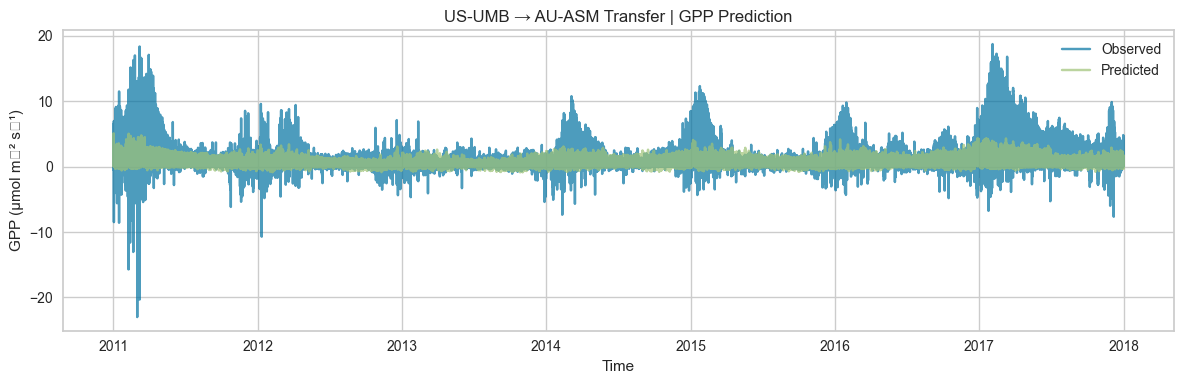

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# ========================== 1. Site paths ==========================

# US-UMB training data
us_met = xr.open_dataset("US-UMB/US-UMB_2000-2014_FLUXNET2015_Met.nc")
us_flux = xr.open_dataset("US-UMB/US-UMB_2000-2014_FLUXNET2015_Flux.nc")

# AU-ASM test data
au_met = xr.open_dataset("AU-ASM/AU-ASM_2011-2017_OzFlux_Met.nc")
au_flux = xr.open_dataset("AU-ASM/AU-ASM_2011-2017_OzFlux_Flux.nc")

# ========================== 2. Feature definitions ==========================

features_raw = ['SWdown', 'LWdown', 'Tair', 'Qair', 'RH', 'Psurf', 'Wind',
                'CO2air', 'VPD', 'LAI', 'Ustar']
derived_features = ['SW_LAI', 'RH_Tair', 'SWdown_lag1', 'Tair_lag1']
target_var = 'GPP'  # or 'NEE'

# ========================== 3. Preprocessing ==========================

def preprocess(met_ds, flux_ds):
    met_df = met_ds.to_dataframe().reset_index()
    flux_df = flux_ds.to_dataframe().reset_index()
    df = pd.merge_asof(met_df.sort_values('time'),
                       flux_df.sort_values('time'),
                       on='time')
    df = df[['time'] + features_raw + ['GPP', 'NEE']].dropna()

    # Derived features
    df['SW_LAI'] = df['SWdown'] * df['LAI']
    df['RH_Tair'] = df['RH'] * df['Tair']
    df['SWdown_lag1'] = df['SWdown'].shift(1)
    df['Tair_lag1'] = df['Tair'].shift(1)

    df = df.dropna().set_index('time').sort_index()
    return df

# ========================== 4. Build train/test data ==========================

df_train = preprocess(us_met, us_flux)
df_test = preprocess(au_met, au_flux)

features_all = features_raw + derived_features

# ========================== 5. AutoML training (US-UMB only) ==========================

train_data = pd.concat([df_train[features_all], df_train[target_var]], axis=1).reset_index(drop=True)

s = setup(
    data=train_data,
    target=target_var,
    session_id=42,
    train_size=0.999,
    fold_strategy='timeseries',
    fold=3,
    fold_shuffle=False,
    data_split_shuffle=False,
    preprocess=True,
    numeric_features=features_all,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    verbose=False
)

best_model = compare_models(sort='R2')

# ========================== 6. Transfer evaluation (on AU-ASM) ==========================

test_data = df_test[features_all].reset_index(drop=True)
true_vals = df_test[target_var].reset_index(drop=True)

preds = predict_model(best_model, data=test_data)
y_pred = preds['prediction_label'].values
y_true = true_vals.values

# ========================== 7. Metrics ==========================

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rho, _ = pearsonr(y_true, y_pred)

print(f"\n🔍 US-UMB → AU-ASM transfer results for {target_var}:")
print(f"Best model: {best_model}")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"ρ:    {rho:.4f}")

# ========================== 8. Visualization: time series comparison ==========================

plt.figure(figsize=(12, 4))
plt.plot(df_test.index, y_true, label="Observed", alpha=0.7)
plt.plot(df_test.index, y_pred, label="Predicted", alpha=0.7)
plt.title(f"US-UMB → AU-ASM Transfer | {target_var} Prediction")
plt.xlabel("Time")
plt.ylabel(f"{target_var} (μmol m⁻² s⁻¹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.1806,4.4866,2.1102,0.8923,0.3470,1.3912,1.6133
lightgbm,Light Gradient Boosting Machine,1.1789,4.5135,2.1176,0.8916,0.3447,1.3975,0.3533
et,Extra Trees Regressor,1.1943,4.5781,2.1334,0.8903,0.3502,1.4445,2.5900
rf,Random Forest Regressor,1.2099,4.6182,2.1423,0.8892,0.3568,1.4572,12.2067
gbr,Gradient Boosting Regressor,1.2029,4.7254,2.1686,0.8868,0.3449,1.4396,8.1800
xgboost,Extreme Gradient Boosting,1.2347,4.9125,2.2093,0.8822,0.3586,1.4744,0.8000
ada,AdaBoost Regressor,1.4850,5.8813,2.4207,0.8589,0.4003,2.0197,1.5233
knn,K Neighbors Regressor,1.4838,6.3101,2.5088,0.8490,0.4211,1.6545,0.1967
lr,Linear Regression,1.6803,8.2999,2.8797,0.8006,0.4606,1.8698,0.1033
ridge,Ridge Regression,1.6826,8.3294,2.8848,0.7998,0.4589,1.9104,0.0967



🔍 US-UMB → AU-ASM Transfer Results for NEE:
Best Model: <catboost.core.CatBoostRegressor object at 0x306a4eaa0>
R²:   -4.5425
RMSE: 4.3829
MAE:  3.5401
ρ:    0.0674


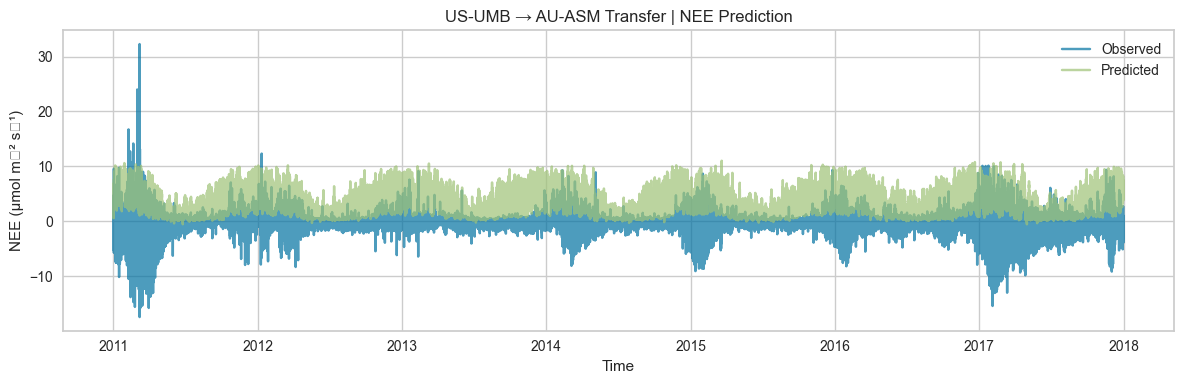

In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# ========================== 1. Site paths ==========================

# US-UMB training data
us_met = xr.open_dataset("US-UMB/US-UMB_2000-2014_FLUXNET2015_Met.nc")
us_flux = xr.open_dataset("US-UMB/US-UMB_2000-2014_FLUXNET2015_Flux.nc")

# AU-ASM test data
au_met = xr.open_dataset("AU-ASM/AU-ASM_2011-2017_OzFlux_Met.nc")
au_flux = xr.open_dataset("AU-ASM/AU-ASM_2011-2017_OzFlux_Flux.nc")

# ========================== 2. Feature definitions ==========================

features_raw = ['SWdown', 'LWdown', 'Tair', 'Qair', 'RH', 'Psurf', 'Wind',
                'CO2air', 'VPD', 'LAI', 'Ustar']
derived_features = ['SW_LAI', 'RH_Tair', 'SWdown_lag1', 'Tair_lag1']
target_var = 'NEE'  # or 'GPP'

# ========================== 3. Preprocessing ==========================

def preprocess(met_ds, flux_ds):
    met_df = met_ds.to_dataframe().reset_index()
    flux_df = flux_ds.to_dataframe().reset_index()
    df = pd.merge_asof(met_df.sort_values('time'),
                       flux_df.sort_values('time'),
                       on='time')
    df = df[['time'] + features_raw + ['GPP', 'NEE']].dropna()

    # Derived features
    df['SW_LAI'] = df['SWdown'] * df['LAI']
    df['RH_Tair'] = df['RH'] * df['Tair']
    df['SWdown_lag1'] = df['SWdown'].shift(1)
    df['Tair_lag1'] = df['Tair'].shift(1)

    df = df.dropna().set_index('time').sort_index()
    return df

# ========================== 4. Build train/test data ==========================

df_train = preprocess(us_met, us_flux)
df_test = preprocess(au_met, au_flux)

features_all = features_raw + derived_features

# ========================== 5. AutoML training (US-UMB only) ==========================

train_data = pd.concat([df_train[features_all], df_train[target_var]], axis=1).reset_index(drop=True)

s = setup(
    data=train_data,
    target=target_var,
    session_id=42,
    train_size=0.999,
    fold_strategy='timeseries',
    fold=3,
    fold_shuffle=False,
    data_split_shuffle=False,
    preprocess=True,
    numeric_features=features_all,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    verbose=False
)

best_model = compare_models(sort='R2')

# ========================== 6. Transfer evaluation (on AU-ASM) ==========================

test_data = df_test[features_all].reset_index(drop=True)
true_vals = df_test[target_var].reset_index(drop=True)

preds = predict_model(best_model, data=test_data)
y_pred = preds['prediction_label'].values
y_true = true_vals.values

# ========================== 7. Metrics ==========================

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rho, _ = pearsonr(y_true, y_pred)

print(f"\n🔍 US-UMB → AU-ASM transfer results for {target_var}:")
print(f"Best model: {best_model}")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"ρ:    {rho:.4f}")

# ========================== 8. Visualization: time series comparison ==========================

plt.figure(figsize=(12, 4))
plt.plot(df_test.index, y_true, label="Observed", alpha=0.7)
plt.plot(df_test.index, y_pred, label="Predicted", alpha=0.7)
plt.title(f"US-UMB → AU-ASM Transfer | {target_var} Prediction")
plt.xlabel("Time")
plt.ylabel(f"{target_var} (μmol m⁻² s⁻¹)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
